# Goal:

The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk in individuals, using various parameters/features.

# Dataset Description:


* 'id'                  : id 
* 'Gender'              : Gender
* 'Age'                 : Age 
* 'Height'              : Height is in meter
* 'Weight'              : Weight is between 39 to 165
* 'family_history_with_overweight' : family history with overweight yes or no
* 'FAVC'                : Frequent consumption of high calorie food yes or no 
* 'FCVC'                : Frequency of consumption of vegetables yes or no 
* 'NCP'                 : Number of main meals
* 'CAEC'                : Consumption of food between meals
* 'SMOKE'               : yes or no 
* 'CH2O'                : Consumption of water daily
* 'SCC'                 : Calories consumption monitoring yes or no 
* 'FAF'                 : Physical activity frequency
* 'TUE'                 : Time using technology devices "How long using technology devices to track your health"
* 'CALC'                : Consumption of alcohol
* 'MTRANS'              : Transportation used
* 'NObeyesdad'          : Target Obesity 

# NObesity values:

*	Insufficient_Weight: Less than 18.5
*	Normal_Weight: 18.5 to 24.9
*	Obesity_Type_I: 30.0 to 34.9
*	Obesity_Type_II: 35.0 to 39.9
*	Obesity_Type_III: Higher than 40
*	Overweight_Level_I, Overweight_Level_II takes values between 25.0 to 29.9

In [2]:
# Importing Required Libraries
# Data manipulation
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Loading data:
train_data = pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test_data = pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")
n_splits = 10
RANDOM_SEED = 43

In [3]:
train_data["Age"]

0        24.443011
1        18.000000
2        18.000000
3        20.952737
4        31.641081
           ...    
20753    25.137087
20754    18.000000
20755    20.101026
20756    33.852953
20757    26.680376
Name: Age, Length: 20758, dtype: float64

In [4]:
# Shape of the data:
print("train_data :", train_data.shape)
print("test_data :", test_data.shape)

train_data : (20758, 18)
test_data : (13840, 17)


In [5]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
train_data.isnull().sum().sort_values(ascending=False)

id                                0
Gender                            0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
CAEC                              0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NObeyesdad                        0
dtype: int64

In [8]:
test_data.isnull().sum().sort_values(ascending=False)

id                                0
CAEC                              0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
NCP                               0
Gender                            0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
MTRANS                            0
dtype: int64

# EDA (Exploratory data analysis)

In [9]:
#Pie Chart of Distribution of NObeyesdad
x = ["Obesity_Type_III", "Obesity_Type_II",
"Normal_Weight",
"Obesity_Type_I",
"Insufficient_Weight",
"Overweight_Level_II",
"Overweight_Level_I"]
y = train_data["NObeyesdad"].value_counts()


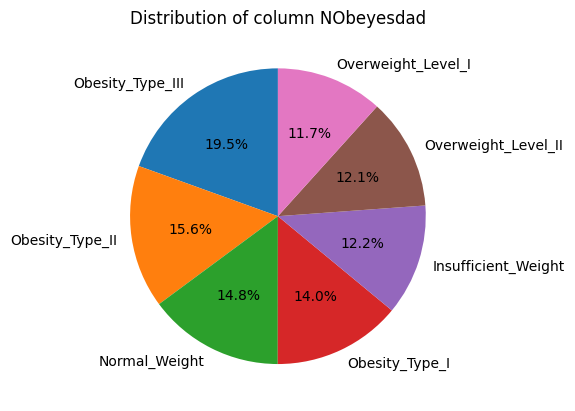

In [10]:
plt.pie(y,autopct='%1.1f%%', startangle=90, labels=x)
plt.title("Distribution of column NObeyesdad")
plt.show()

## Categorical variables distribution

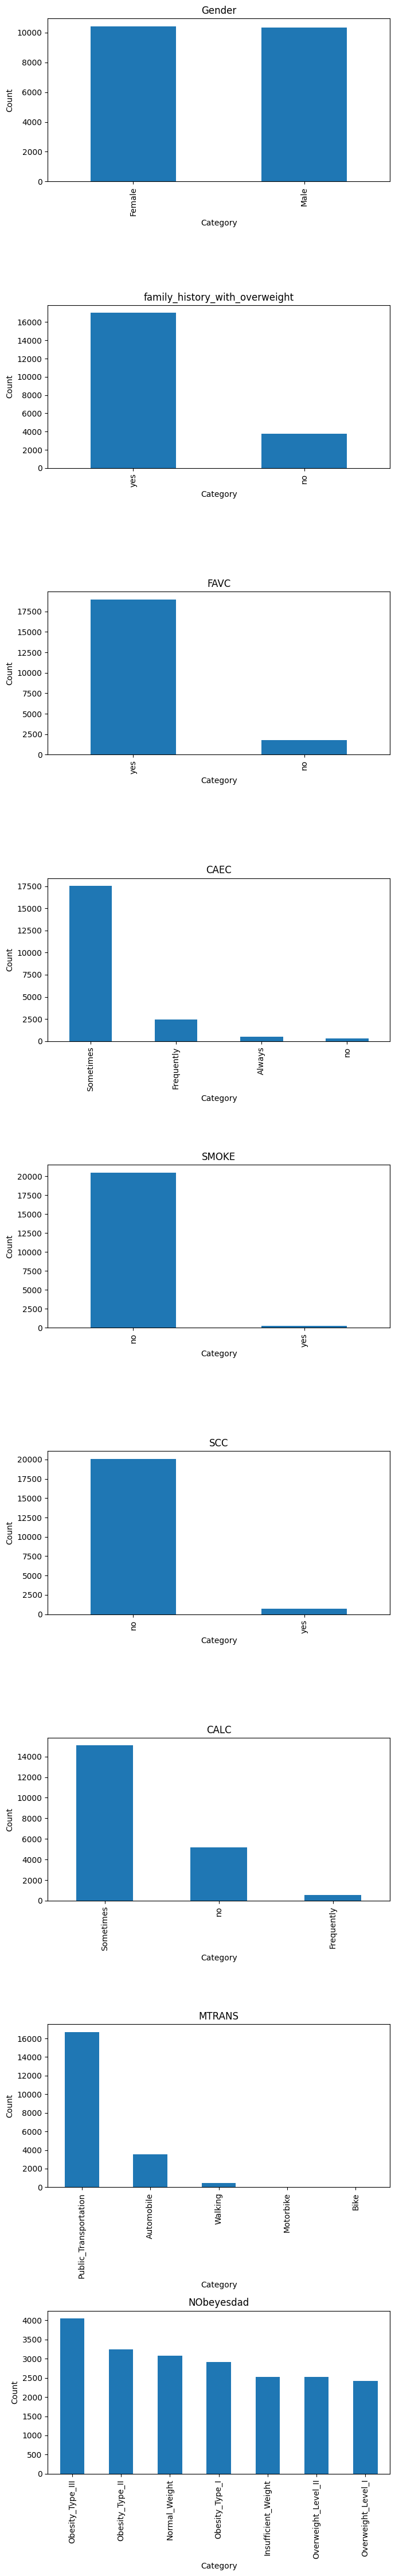

In [11]:
# Automatically select columns with object dtype (common for categorical data)
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(7, len(categorical_cols) * 5)) 
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols),1,i)  
    train_data[col].value_counts().plot(kind='bar', title=col)
    plt.ylabel('Count')
    plt.xlabel('Category')

plt.tight_layout()  
plt.show()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64


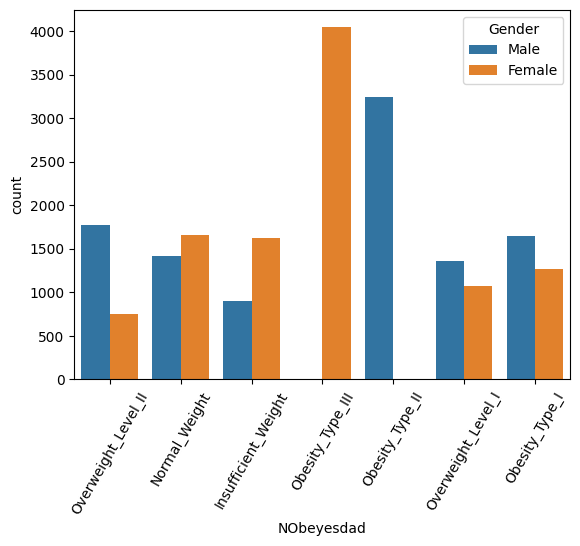

In [12]:
print(train_data['NObeyesdad'].value_counts())
sns.countplot(x='NObeyesdad',hue='Gender', data=train_data)
plt.xticks(rotation=60)
plt.show()

In [13]:
# print(train_data['NObeyesdad'].value_counts())
# sns.countplot(x='NObeyesdad',hue='SMOKE', data=train_data)
# plt.xticks(rotation=60)
# plt.show()

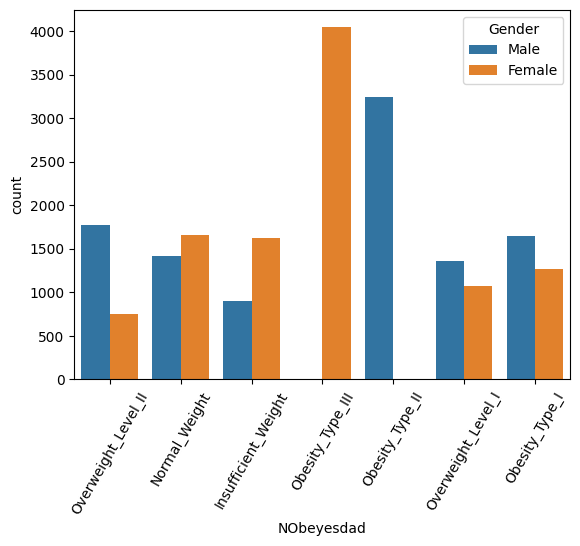

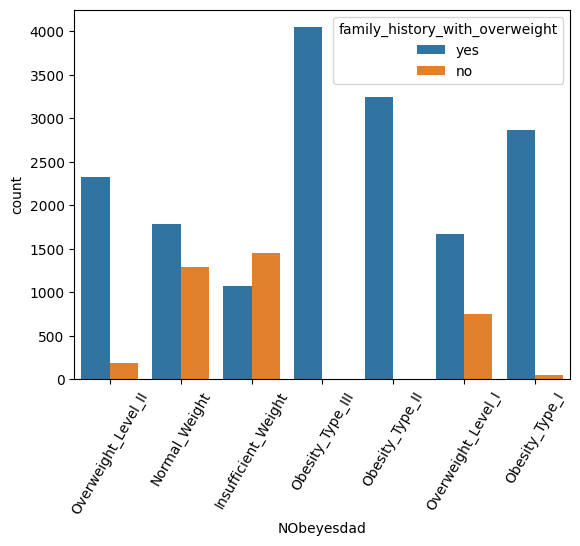

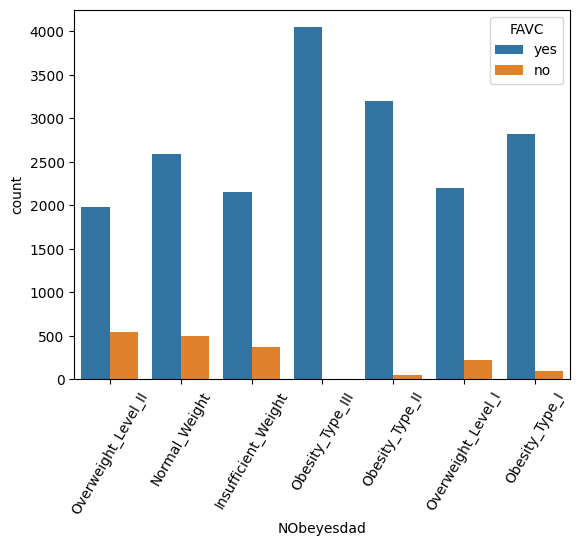

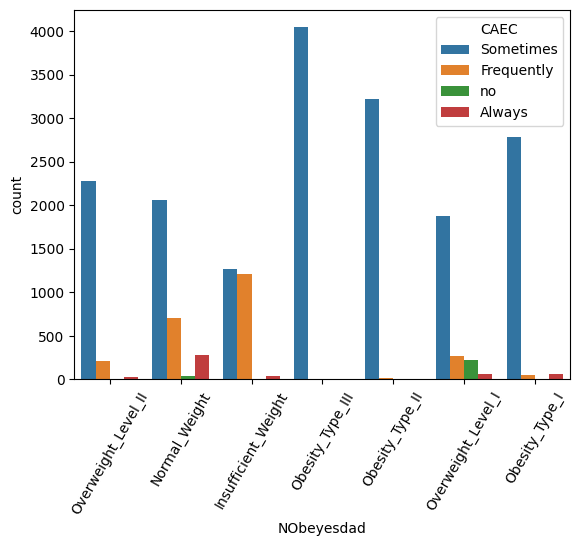

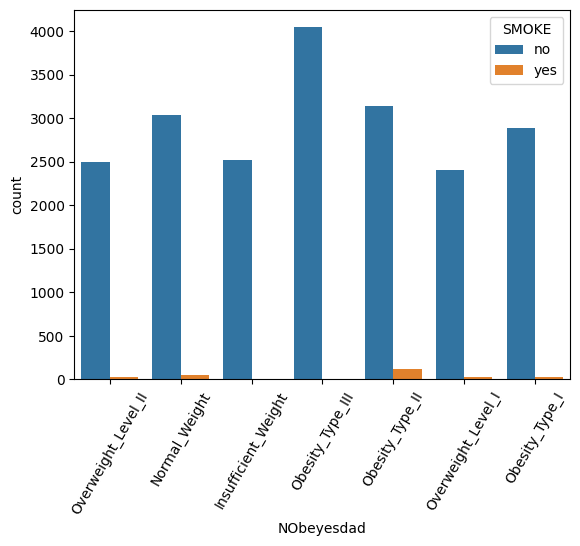

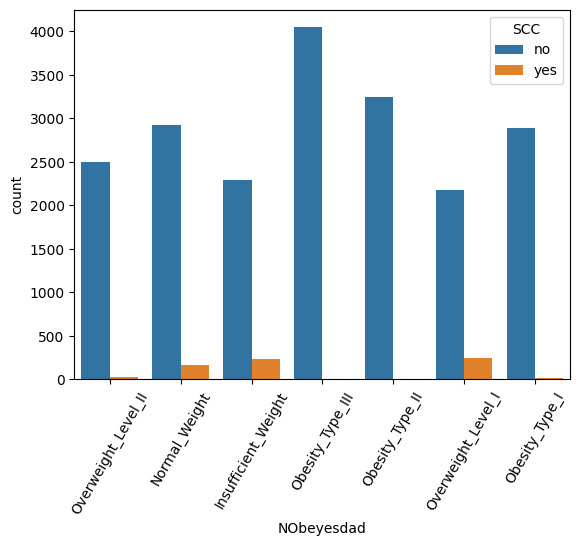

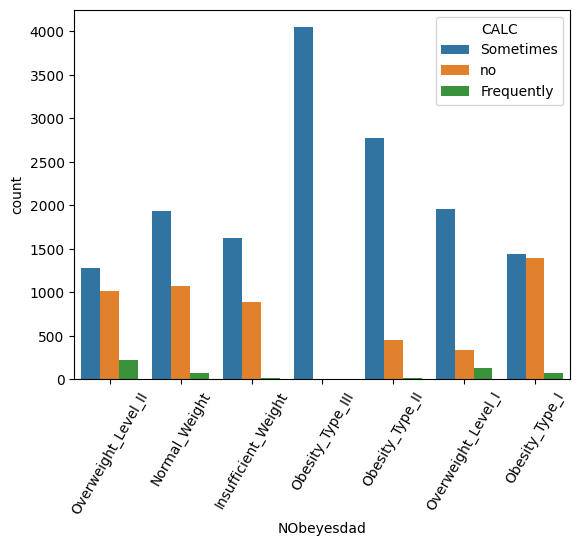

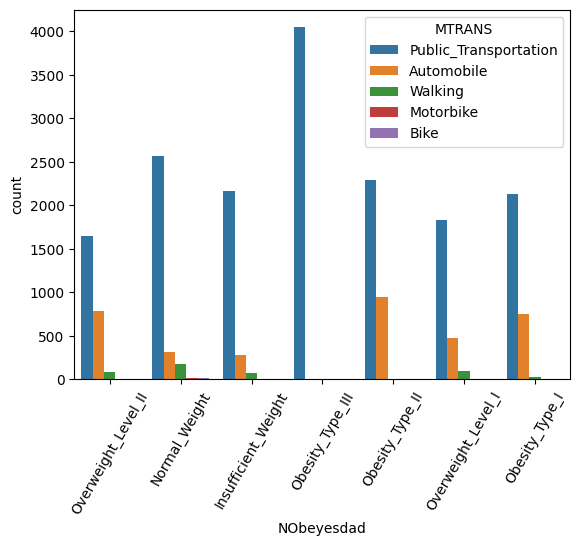

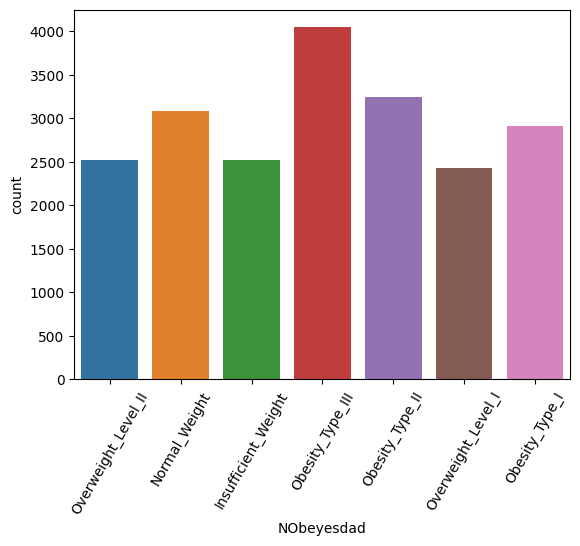

In [14]:
for i in categorical_cols:
    sns.countplot(x='NObeyesdad',hue= i, data=train_data)
    plt.xticks(rotation=60)
    plt.show()

## Ordinal variables distribution

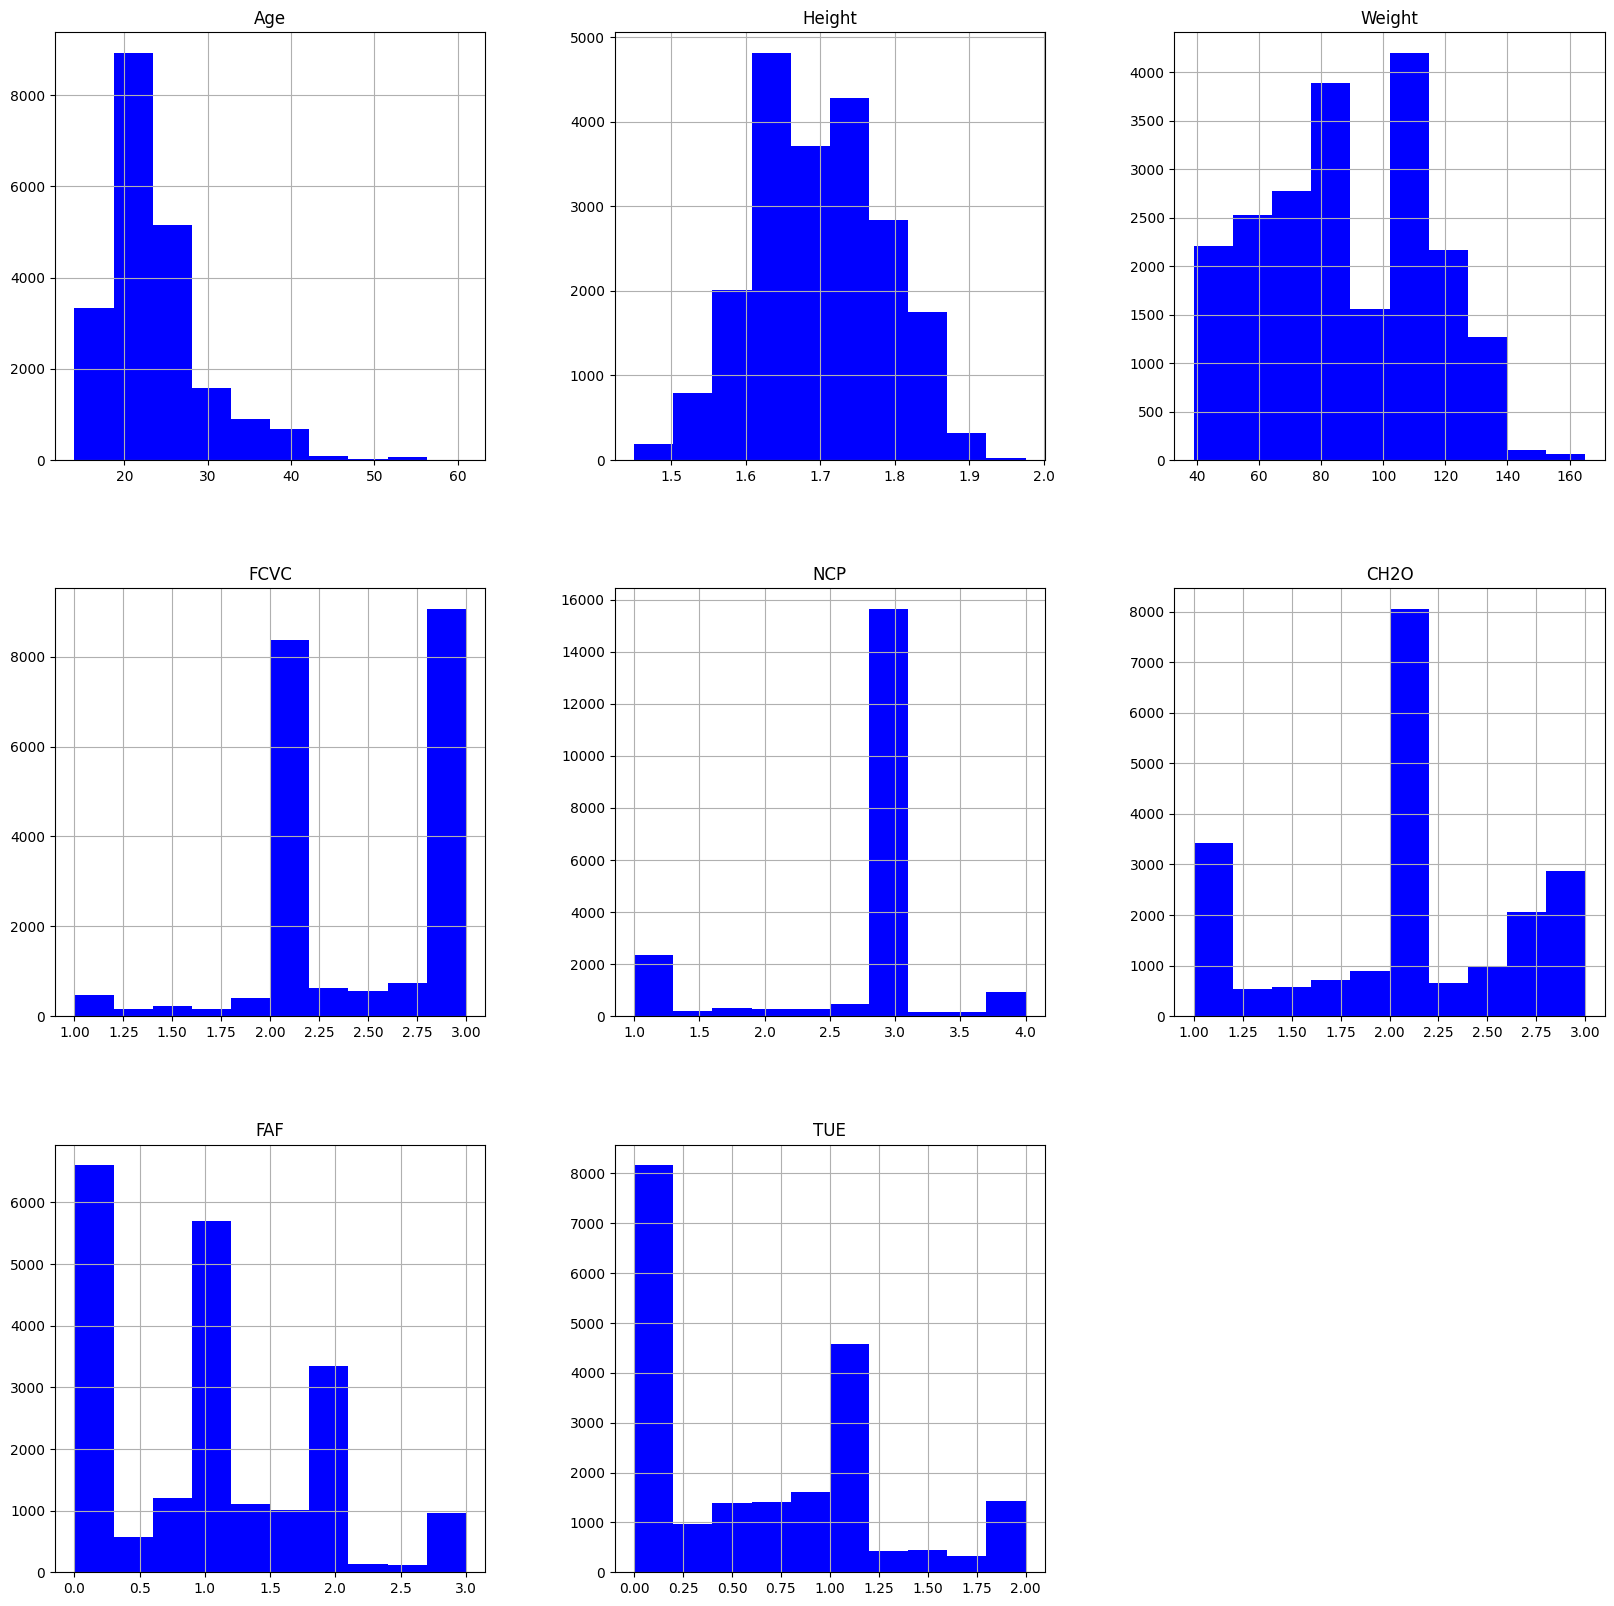

In [15]:
train_data.drop(['id'],axis=1).hist(figsize=(20,20),color = 'blue')
plt.show()

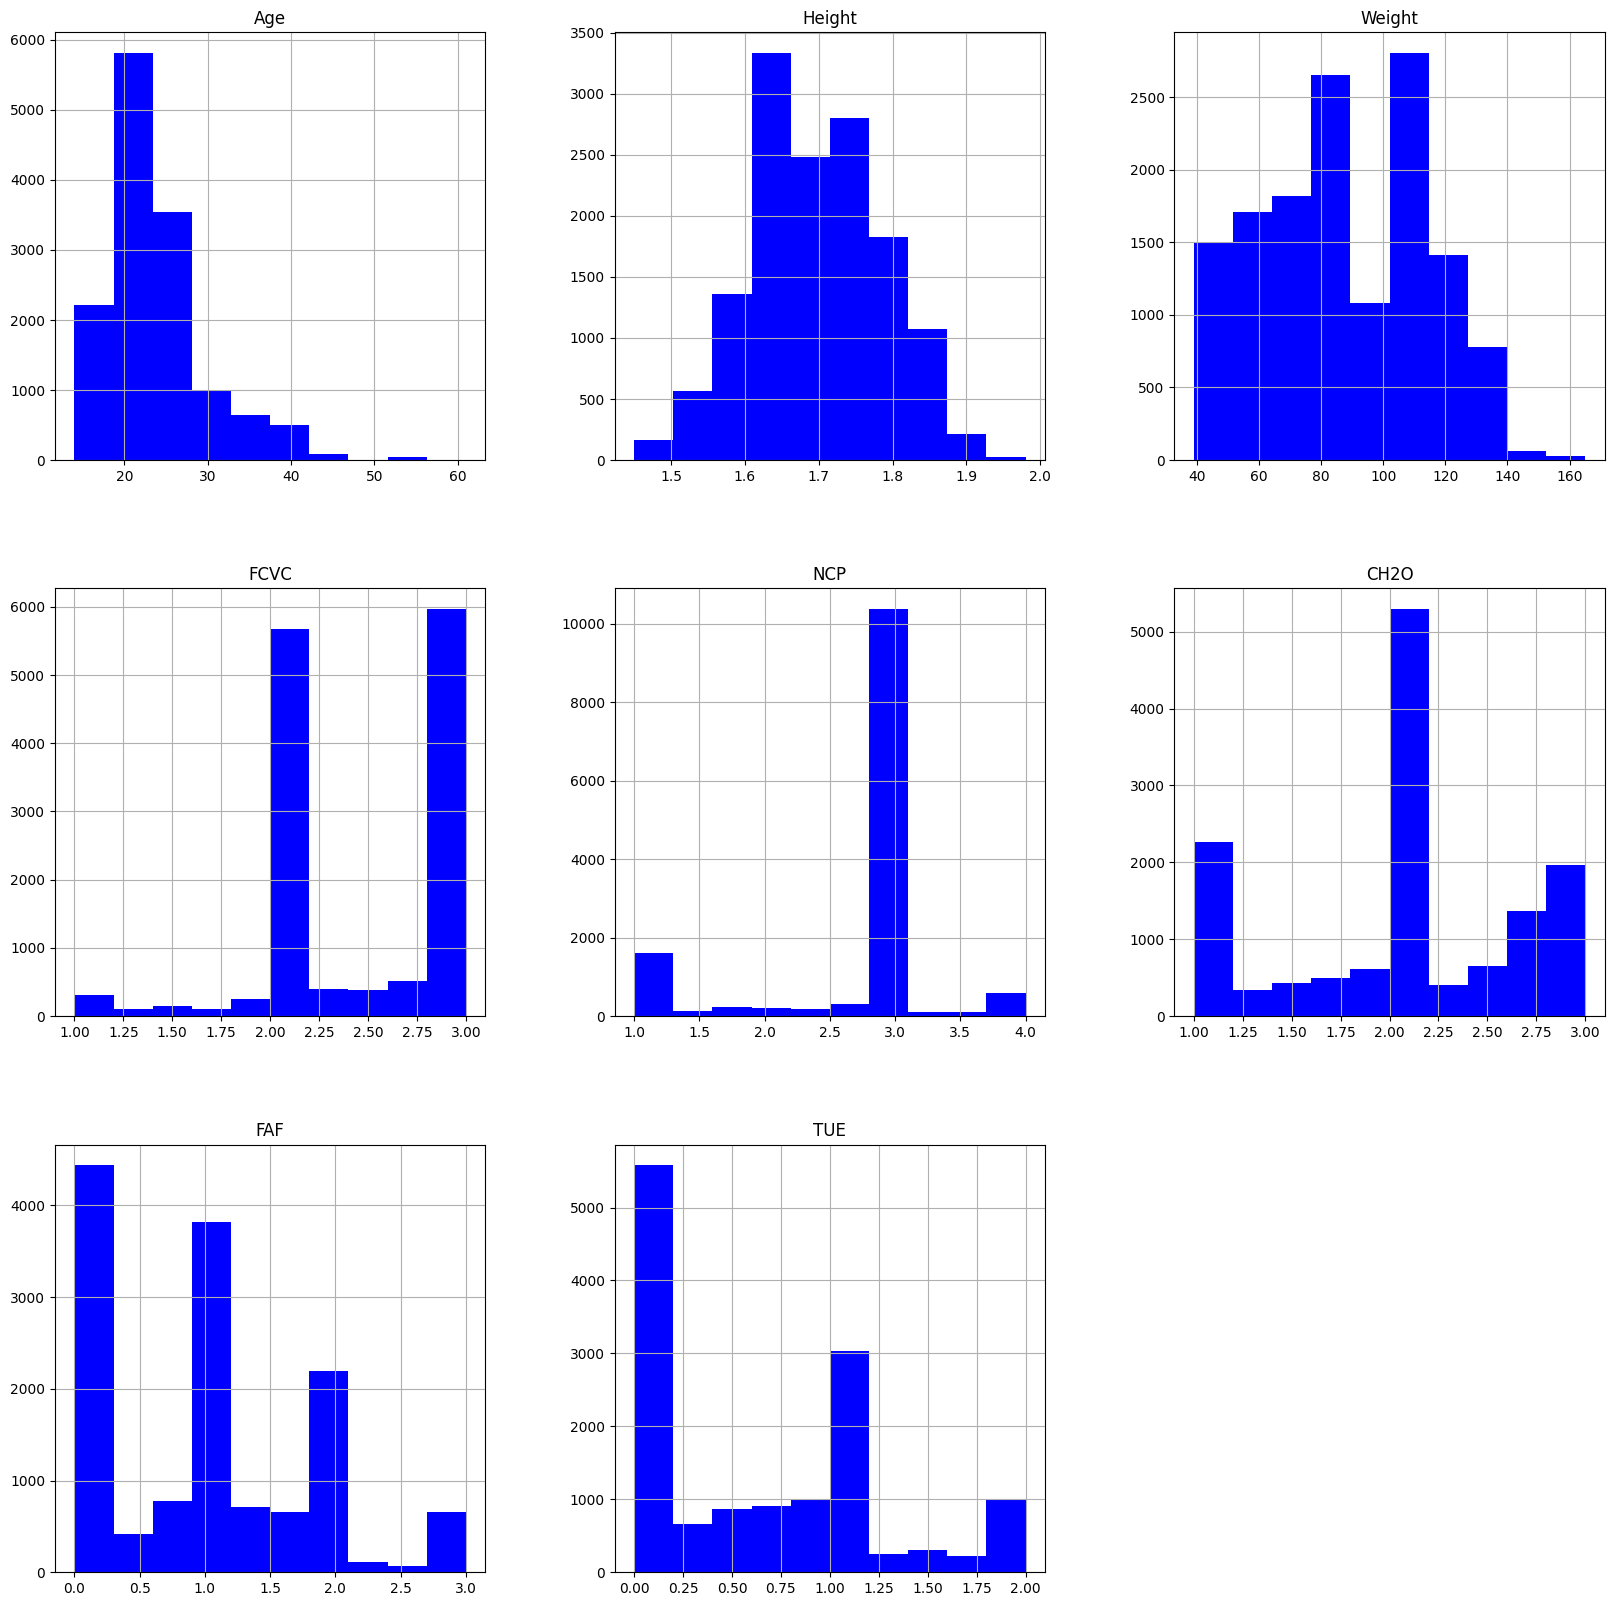

In [16]:
test_data.drop(['id'],axis=1).hist(figsize=(20,20),color = 'blue')
plt.show()

In [17]:
# train_data = train_data.drop("id", axis=1)
train_data = train_data.drop_duplicates()
print("shape of the data :",train_data.shape)

shape of the data : (20758, 18)


In [18]:
#test_data = test_data.drop("id", axis=1)
data = pd.concat([train_data, test_data.drop("id", axis=1)], ignore_index=True)
data = data.drop_duplicates()
print("shape of the data :",data.shape)

shape of the data : (34598, 18)


In [19]:
data.isnull().sum()

id                                13840
Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

## Numerical Correlation Plot

In [20]:
raw_num_cols = list(train_data.select_dtypes("float").columns) 
raw_cat_cols = list(train_data.columns.drop(raw_num_cols+["NObeyesdad"]))

<Axes: >

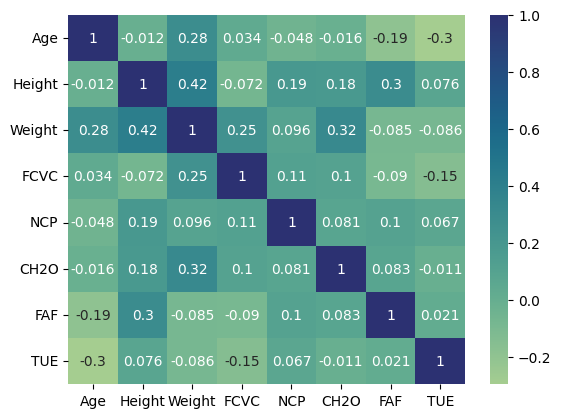

In [21]:
tmp = train_data[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True, cmap ="crest")

In [22]:
#Revisit
# Categorical correlation(tbr)
# tmp = train_data[raw_cat_cols].corr("spearman")
# sns.heatmap(tmp,annot=True,cmap ="crest")

## Combined Numerical Plots

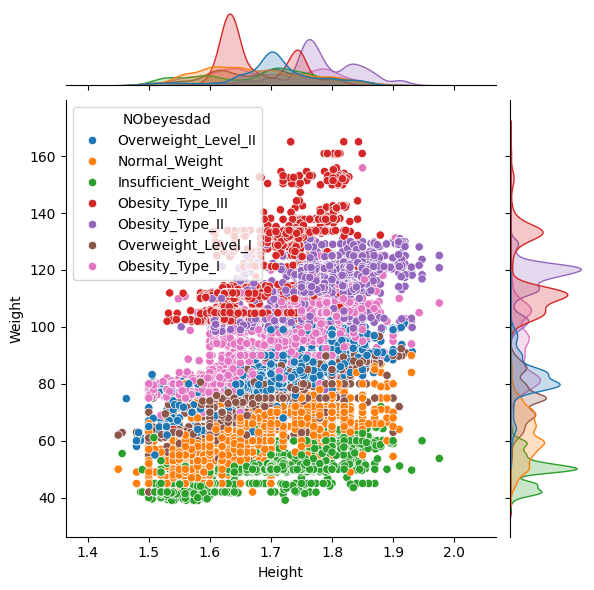

In [23]:
sns.jointplot(data=train_data, x="Height", y="Weight", hue="NObeyesdad",height=6)

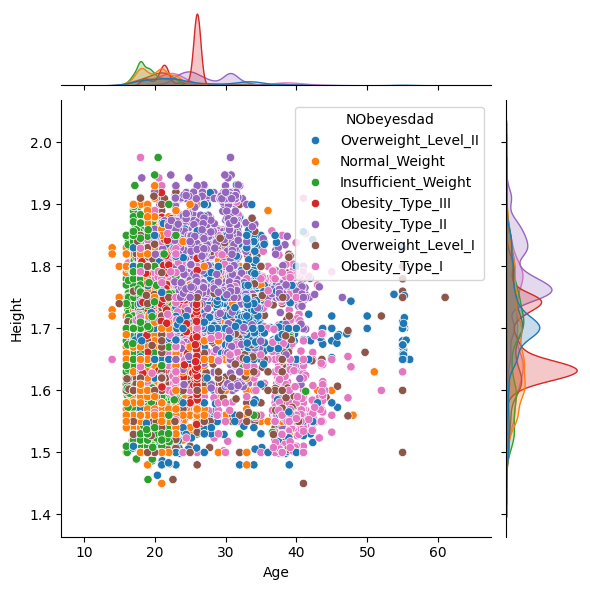

In [24]:
sns.jointplot(data=train_data, x="Age", y="Height", hue="NObeyesdad",height=6)

## Principal Component Analysis (PCA) & KMeans Clustering

c:\Users\Palak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


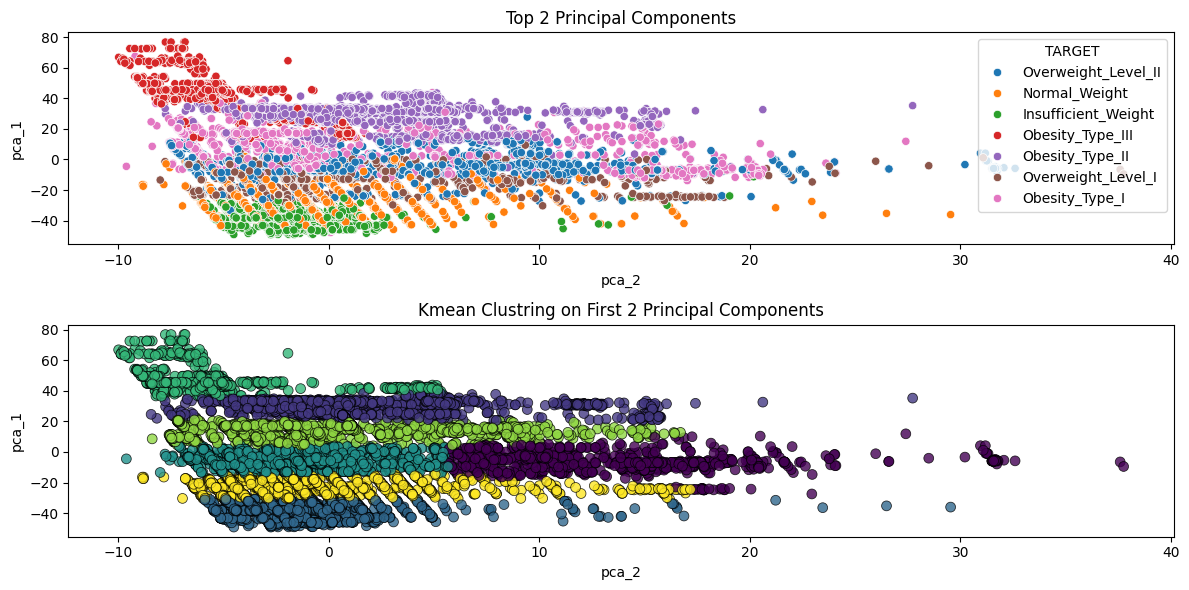

In [ ]:
#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(train_data[raw_num_cols])

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['TARGET'] = train_data['NObeyesdad']

fig,axs = plt.subplots(2,1,figsize = (12,6))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET',ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

#KMeans
kmeans = KMeans(7,random_state=42)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Kmean Clustring on First 2 Principal Components")
plt.tight_layout()
plt.show()

# Feature Engineering

In [26]:
def transform_feats(data):
    
    data['Gender_binary'] = data['Gender'].map({'Male': 1, 'Female': 0}).astype(int)
    data['family_history_with_overweight_binary'] = data['family_history_with_overweight'].map({'yes': 1, 'no': 0}).astype(int)
    data['SMOKE_binary'] = data['SMOKE'].map({'yes': 1, 'no': 0}).astype(int)
    
    
    data["CAEC"] = data["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}).astype(np.uint8)
    data['SCC']  = np.where(data["SCC"] == "no", 1,0).astype(np.uint8)
    data["CALC"] = data["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}).astype(np.uint8)
    
    return data

def feature_engineering(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    # Activity
    data['Activity'] = data['FAF'] * data['TUE']
    # Age group
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, float('inf')], labels=[0, 1, 2, 3])
    data['Age_Group'] = data['Age_Group'].astype(int)
    # Height group
    data['Height_Group'] = pd.cut(data['Height'], bins=[0, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, float('inf')], labels=[0, 1, 2, 3, 4, 5, 6])
    data['Height_Group'] = data['Height_Group'].astype(int)
    #Risk score
    data['Risk factor'] = (data['BMI'] + data['Age_Group']) * (data["family_history_with_overweight_binary"] + data["SMOKE_binary"])
    

In [27]:
# transform_feats(train_data)
# feature_engineering(train_data)

In [28]:
train_data[:5]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
# copy of data
data1 = train_data

In [ ]:
columns_to_drop = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "SMOKE",
    "MTRANS",
    "NObeyesdad"
]
train_data = train_data.drop(columns=columns_to_drop)

In [ ]:
train_data.to_csv('../data/processed_train.csv', index=False)
print("Preprocessing complete. Cleaned data has been saved!")
print("Next Step -> Model_Training_and_Evaluation")

Preprocessing complete. Cleaned data has been saved!
Next Step -> Model_Training_and_Evaluation
